https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf

In [123]:
import numpy as np
import cv2 as cv

img = cv.imread('data/umn-hw2/Hyun_Soo_target1.jpg')

img.shape

(812, 1441, 3)

In [124]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

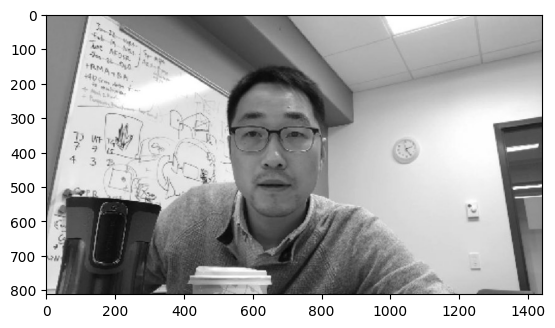

In [125]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap=plt.get_cmap('gray'))

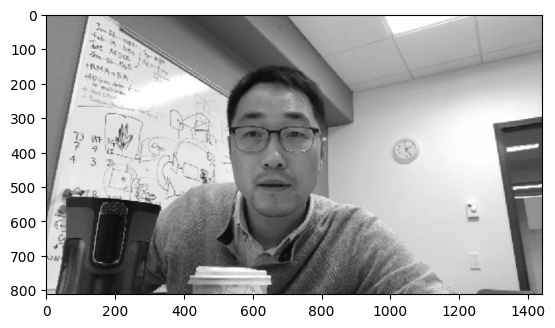

In [126]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))

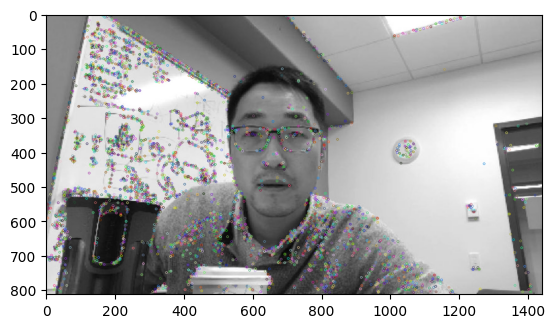

In [127]:
sift = cv.xfeatures2d.SIFT_create(edgeThreshold=10)
kp, des1 = sift.detectAndCompute(gray, None)

img_keypoints = cv.drawKeypoints(gray, kp, None)
plt.imshow(img_keypoints)

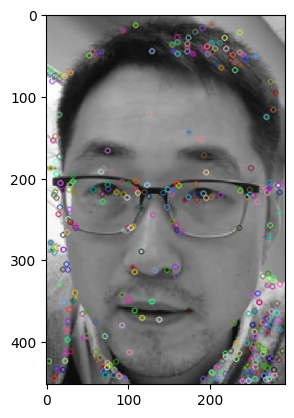

In [128]:
template_img = cv.imread('data/umn-hw2/Hyun_Soo_template.jpg')
template_gray = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
template_kp, template_des = sift.detectAndCompute(template_gray, None)

plt.imshow(cv.drawKeypoints(template_gray, template_kp, None))

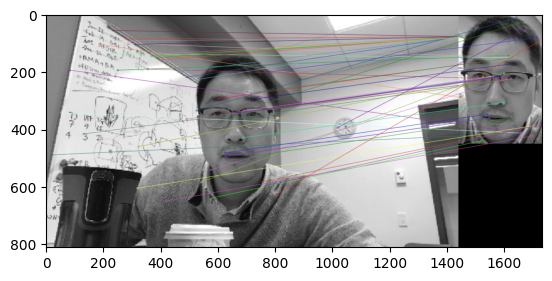

In [129]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, template_des, k=2)

good = []
for m,n in matches:
    if m.distance < .7*n.distance:
        good.append(m)

img3 = cv.drawMatchesKnn(
    img1=img,
    keypoints1=kp,
    img2=template_img,
    keypoints2=template_kp,
    matches1to2=[[v] for v in good],
    outImg=None,
    flags=2
)
plt.imshow(img3)


In [130]:
points1 = np.float32([kp[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
points2 = np.float32([template_kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

M, inliers_mask = cv.estimateAffine2D(
  points1,
  points2,
  cv.RANSAC, ransacReprojThreshold=3, maxIters=2000, confidence=.99, refineIters=10)

In [131]:
inliers_mask.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [132]:
len(good), inliers_mask.shape

(52, (52, 1))

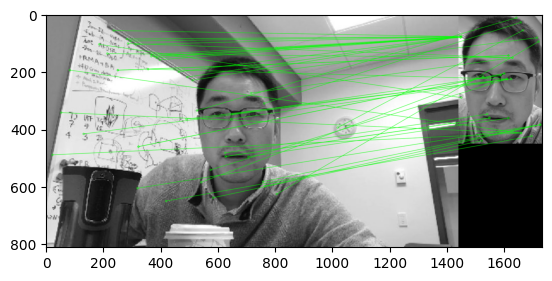

In [133]:
inliers = np.array(good)[inliers_mask.ravel() == 1]
outliers = np.array(good)[inliers_mask.ravel() == 0]

img_inliers = cv.drawMatches(
  img, kp, template_img, template_kp, inliers, None, matchColor=(0,255,0), singlePointColor=(0,255,0), matchesMask=None, flags=2)
plt.imshow(img_inliers)

img_outliers = cv.drawMatches(
  img, kp, template_img, template_kp, outliers, None, matchColor=(0,255,0), singlePointColor=(0,255,0), matchesMask=None, flags=2)
plt.imshow(img_outliers)

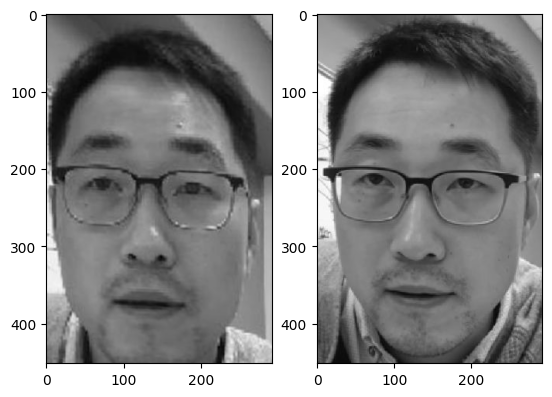

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()

height, width = template_img.shape[:2]
transformed_image = cv.warpAffine(img, M, (width, height))
ax[0].imshow(transformed_image)
ax[1].imshow(template_img)

(452, 292, 3) (452, 292, 3) (452, 292)


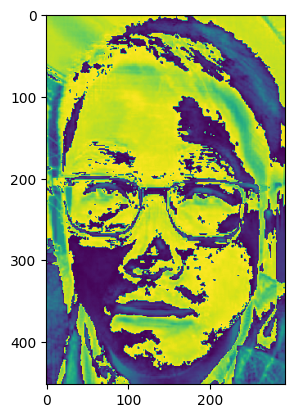

In [146]:
error_img = np.abs(cv.cvtColor(transformed_image, cv.COLOR_BGR2GRAY) - template_gray)
print(transformed_image.shape, template_img.shape, error_img.shape)
plt.imshow(error_img)

In [147]:
M

array([[ 9.50969357e-01,  2.21972719e-03, -4.98725086e+02],
       [ 3.98704406e-02,  1.02689112e+00, -1.60910528e+02]])